<a href="https://colab.research.google.com/github/ToshiroHJJZ/Machine_Learning_in_the_Cloud/blob/main/ML3_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Jonathan Penaloza**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
# prompt: Load the banknote_authentication.csv into a data frame named df.

df = pd.read_csv('/content/gdrive/MyDrive/MLA3_JP/banknote_authentication.csv')

### Statistical and Visual Exploration

In [9]:
# prompt: Summarize the numerical columns of data.
# Get the counts of forgery vs no forgery. Save this into a data frame so you can plot it.

# Summarize numerical columns
numerical_summary = df.describe()
print(numerical_summary)

# Get counts of forgery vs no forgery
forgery_counts = df['forgery'].value_counts()
print(forgery_counts)

# Save counts into a DataFrame for plotting
forgery_df = pd.DataFrame({'forgery': forgery_counts.index, 'Count': forgery_counts.values})
forgery_df


          variance     skewness     curtosis      entropy      forgery
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
forgery
0    762
1    610
Name: count, dtype: int64


,forgery,Count
0,0,762
1,1,610


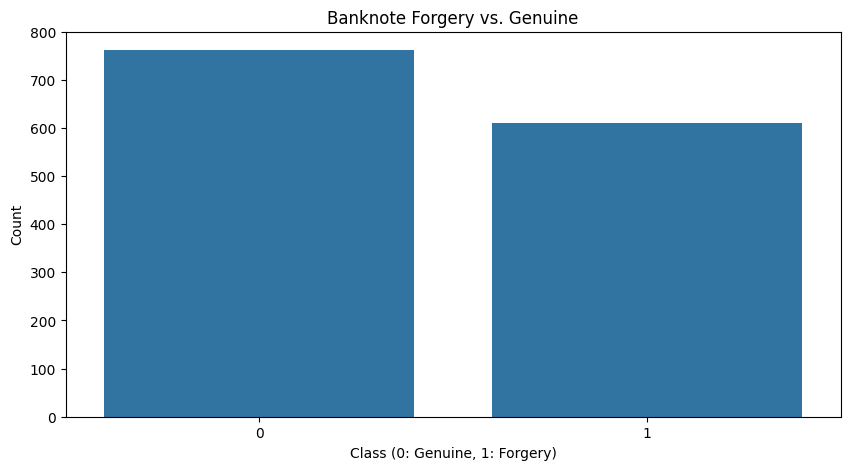

In [10]:

# Create a barplot to view how many banknotes are forgeries and how many are not.
plt.figure(figsize=(10, 5))
sns.barplot(x='forgery', y='Count', data=forgery_df)
plt.title('Banknote Forgery vs. Genuine')
plt.xlabel('Class (0: Genuine, 1: Forgery)')
plt.ylabel('Count')
plt.show()

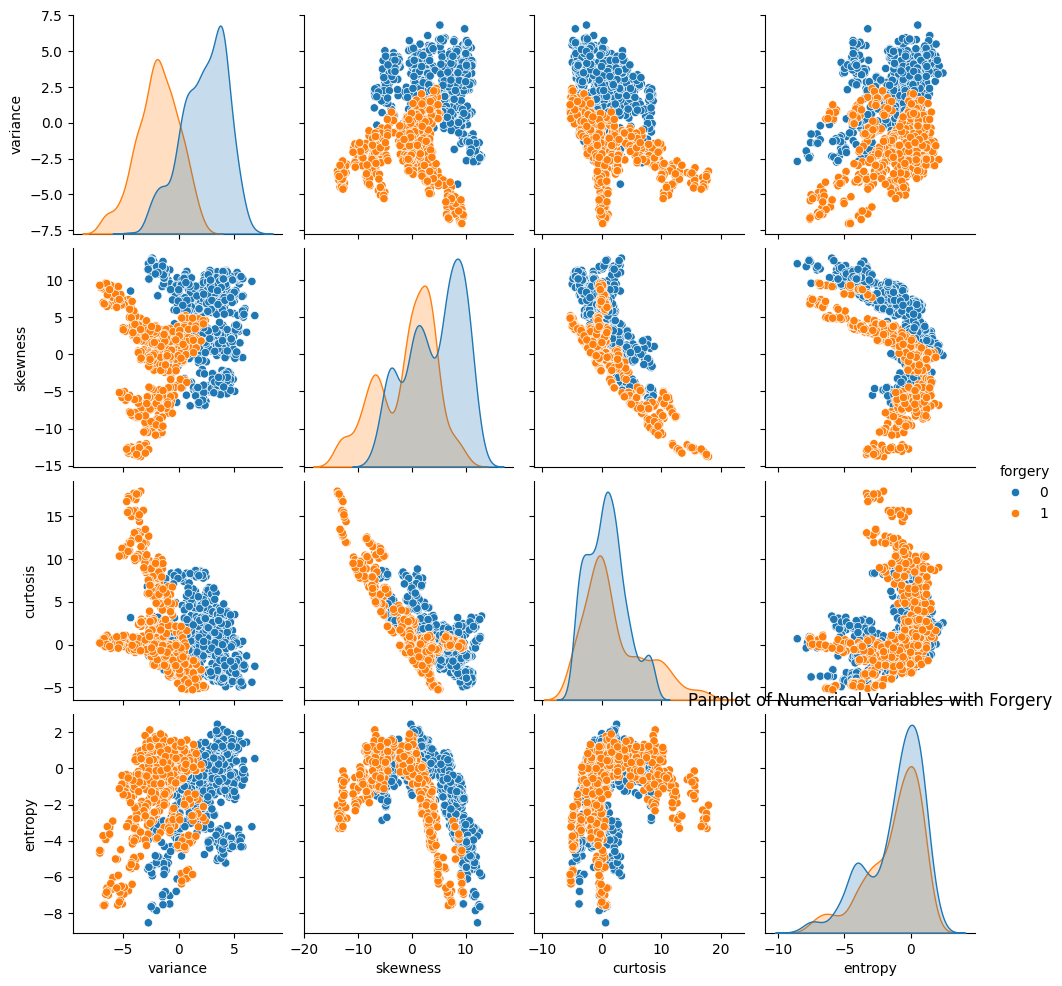

In [11]:
# Create a pairplot of all of the numerical variables using Seaborn.
sns.pairplot(df, hue='forgery')
plt.title('Pairplot of Numerical Variables with Forgery')
plt.show()

Notable Patterns in Pairplot:
* Distribution Skewness: The distribution of forgeries (e.g., Variance of Wavelet Transformed Image) appears to have less skewness compared to genuine entries.

* Potential for Class Distinction: Some variable pairings show promise in separating the 'genuine' and 'forgery' categories. For example, the scatter plot of 'Variance' against 'Skewness' reveals a noticeable difference between the two classes.

* Feature Correlation: Certain features seem to exhibit correlations, which could either aid or hinder the model's performance, depending on the model type. For instance, a possible negative correlation between 'Variance' and 'Skewness' could be confirmed using a heatmap.

* General Observation: When looking at the tables, forgery data tends to have smaller values compared to the genuine class.

### Splitting Data into Train/Test

In [12]:
# prompt: Splitting Data into Train/Test
# Create a data frame called X of your inputs that includes all columns except date and forgery.
# Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.

X = df.drop(['forgery'], axis=1)
y = df['forgery']

In [16]:
# prompt: Split the data into Train/Test sets.  Use 20% of the data for testing.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [17]:
# prompt: Create a column transformer that will MinMax scale the numerical variables
# Create a pipeline that will transform the data and then run a SVM Classification using the linear kernel.

from sklearn.svm import SVC

numerical_features = ['variance', 'skewness', 'curtosis', 'entropy']

# Create a column transformer to scale numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features)
    ], remainder='passthrough')

# Create a pipeline with the column transformer and SVC classifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', SVC(kernel='linear'))
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

### Executing the Model

In [18]:
# prompt: Run the pipeline to fit the SVC Classification model.

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

### Evaluating Model

Precision: 0.9692
Recall: 0.9921
F1 Score: 0.9805


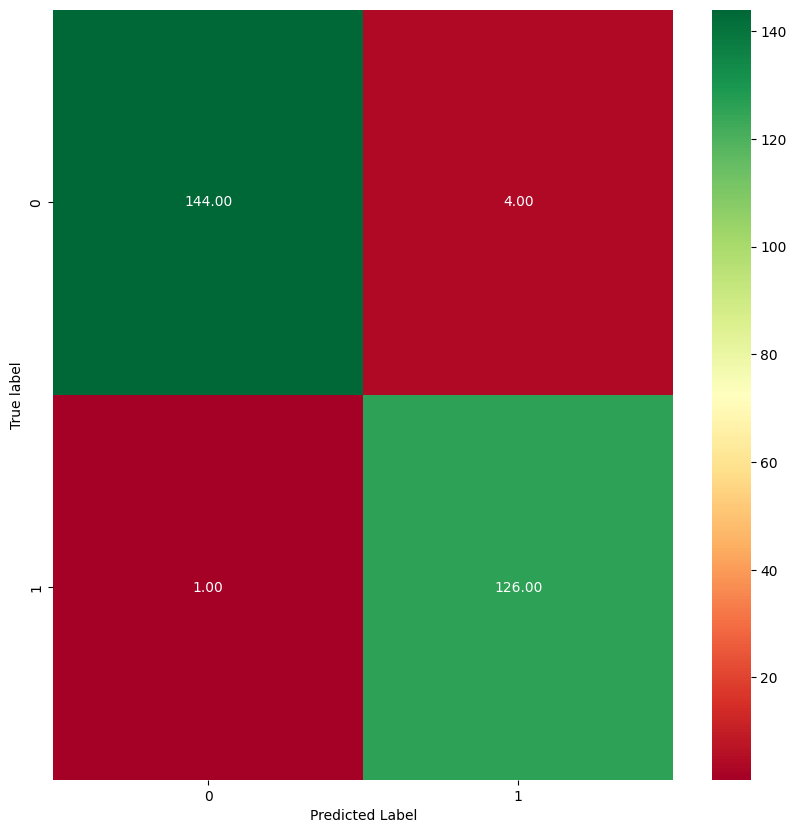

In [19]:
# prompt: Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
# Call the plot_cm function to generate the confusion matrix.
# Calculate the precision, recall, and F1 score.

# Plot the confusion matrix
plot_cm(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision (0.9692): Of all the positive predictions, 96.92% were accurate.

Recall (0.9921): Out of all the actual positives, 99.21% were correctly identified.

F1 Score (0.9805): This balanced measure of precision and recall indicates high model performance.

### Conclusion
The model is demonstrating excellent performance. With a precision of 96.92%, recall of 99.21%, and an F1 score of 98.05%, it effectively identifies true positives while maintaining a solid balance between precision and recall. The consistently high values across these metrics highlight the model's overall effectiveness.

## Problem 2

### Reading the Data

In [20]:
df = pd.read_csv('/content/gdrive/MyDrive/MLA3_JP/Steel_industry_data.csv')

In [21]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [22]:
# prompt: name columns as usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type

df.columns = ['date','usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']

### Splitting Data into Train/Test

In [24]:
# Create a data frame called x of your inputs that includes all columns except date and usage_kwh.
# Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.
# Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames x_train, x_test, y_train,  and y_test.

x = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [26]:
# prompt: Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).
# Create a pipeline that will transform the data and then run an Support Vector Machine Regression.

from sklearn.svm import SVR

numerical_features = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
categorical_features = ['week_status', 'day_of_week', 'load_type']

# Create a column transformer to scale numerical features and one-hot encode categorical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

# Create a pipeline with the column transformer and SVR regressor
pipeline = Pipeline([
    ('transformer', ct),
    ('regressor', SVR(kernel='linear'))
])


# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

# Evaluate the model using R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.9842
RMSE: 4.2430


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Executing the Model

In [27]:
# prompt: Run the pipeline to fit the Support Vector Machine Regression.

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

R-squared (0.9842): This indicates that 98.42% of the variation in the dependent variable is accounted for by the independent variables in the model, signaling a very strong fit.

RMSE (4.2430): The Root Mean Squared Error reflects the average difference between the predicted and actual values. A lower RMSE indicates better accuracy, and in this case, an RMSE of 4.2430 suggests the model’s predictions are quite accurate.

RMSE (Train: 4.8538): This is the Root Mean Squared Error for the training data, representing the average error in predictions when the model was trained.

RMSE (Test: 4.2430): This value represents the Root Mean Squared Error for the test data, indicating how accurately the model performed when applied to the test dataset.

### Evaluating Model

In [ ]:
# prompt: Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
# Calculate the root mean squared error for both train and test.

# Predict on the training data
y_pred_train = pipeline.predict(x_train)

# Calculate RMSE for training data
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Calculate RMSE for test data
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE (Train): {rmse_train:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")

### Conclusion
The lower RMSE on the test data compared to the training data indicates that the model is performing effectively and not overfitting, meaning it generalizes well to unseen data. In other words, the model is both accurate and dependable.

In summary, these metrics demonstrate strong model performance, as it captures nearly all the variance with minimal prediction errors.